<a href="https://colab.research.google.com/github/HungNguyen205/HK5--ThucHanhTriTueNhanTao/blob/main/THTTNT_2001230284_NguyenCaoManhHung_Buoi04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align ="center"><font color ="purple">⛅Báo Cáo Thực Hành Trí Tuệ Nhân Tạo</font></h1>
<h3>🚩Tuần 4 - Chủ đề: CÁC PHƯƠNG PHÁP GIẢI BÀI TOÁN THỎA MÃN RÀNG BUỘC</h3>

---

**Họ và tên:** Nguyễn Cao Mạnh Hùng<br/>
**MSSV:** 2001230284


<div style="text-align: justify">
&emsp;&emsp;Tạo dữ liệu đồ thị (Ma trận kề)
</div>

In [1]:
%%writefile graph.txt
0 1 1 0 1 0
1 0 1 1 0 1
1 1 0 1 1 0
0 1 1 0 0 1
1 0 1 0 0 1
0 1 0 1 1 0

Writing graph.txt


<div style="text-align: justify;">
&emsp;&emsp;Hàm tiện ích để load dữ liệu từ file text vào mảng 2 chiều
</div>

In [2]:
import os

def loadGraph(filename):
    """
    Bài 1: Đọc file ma trận kề dạng txt
    Input: Tên file
    Output: Ma trận kề (List of lists)
    """
    matrix = []
    try:
        with open(filename, 'r') as f:
            for line in f:
                # Chuyển đổi chuỗi số trong dòng thành list số nguyên
                row = [int(x) for x in line.strip().split()]
                if row: # Bỏ qua dòng trống
                    matrix.append(row)
        print(f"-> Đã đọc file '{filename}' thành công.")
        return matrix
    except FileNotFoundError:
        print(f"Lỗi: Không tìm thấy file {filename}")
        return None

<div style="text-align: justify;">
&emsp;&emsp;Thuật toán tô màu đồ thị
</div>

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

# --- HÀM VẼ ĐỒ THỊ ---
def draw_graph_step(G_nx, pos, current_solution, step_num, node_names, selected_node):
    """Vẽ đồ thị và làm nổi bật đỉnh vừa được tô"""
    plt.figure(figsize=(5, 3))

    node_colors = []
    edge_colors = []

    for node in G_nx.nodes():
        if node in current_solution:
            node_colors.append(current_solution[node].lower())
        else:
            node_colors.append('lightgray') # Màu mặc định chưa tô

    # Vẽ đồ thị
    nx.draw(G_nx, pos,
            with_labels=True,
            node_color=node_colors,
            node_size=800,
            font_weight='bold',
            edge_color='gray')

    plt.title(f"Bước {step_num}: Đã chọn đỉnh {selected_node}")
    plt.show()

# --- HÀM CHÍNH ---
def graph_coloring_visualized(G):
    num_nodes = len(G)
    nodes = [chr(65 + i) for i in range(num_nodes)] # A, B, C...

    # 1. Setup NetworkX để vẽ
    G_nx = nx.Graph()
    for i in range(num_nodes):
        G_nx.add_node(nodes[i])
        for j in range(i + 1, num_nodes):
            if G[i][j] == 1:
                G_nx.add_edge(nodes[i], nodes[j])
    pos = nx.circular_layout(G_nx)

    # 2. Setup Thuật toán
    # Tính bậc ban đầu
    current_degrees = [sum(G[i]) for i in range(num_nodes)]
    theSolution = {}
    forbidden_colors = {i: set() for i in range(num_nodes)}
    color_names = ["Blue", "Red", "Yellow", "Green", "Purple", "Orange"]

    step_count = 0

    # VÒNG LẶP CHÍNH
    while len(theSolution) < num_nodes:
        step_count += 1
        print(f"\n" + "="*40)
        print(f"CHUẨN BỊ BƯỚC {step_count}")

        # --- HIỂN THỊ BẢNG SỐ BẬC ---
        # Tạo dữ liệu trạng thái để hiển thị
        status_list = []
        for n in nodes:
            if n in theSolution:
                status_list.append(f"Đã tô ({theSolution[n]})")
            else:
                status_list.append("Chưa tô")

        # Tạo DataFrame (Bảng)
        df = pd.DataFrame([current_degrees, status_list],
                          columns=nodes,
                          index=["Bậc hiện tại", "Trạng thái"])

        # Hiển thị bảng ra màn hình
        print("Bảng bậc các đỉnh:")
        display(df)
        # -----------------------------

        # BƯỚC 1: Chọn đỉnh bậc lớn nhất
        max_degree = -1
        selected_idx = -1

        for i in range(num_nodes):
            if nodes[i] not in theSolution:
                if current_degrees[i] > max_degree:
                    max_degree = current_degrees[i]
                    selected_idx = i
                # Nếu bậc bằng nhau, code này ưu tiên index nhỏ hơn (A trước B...)

        if selected_idx == -1: break

        # Chọn màu
        color_code = 0
        while color_code in forbidden_colors[selected_idx]:
            color_code += 1

        current_node_name = nodes[selected_idx]
        theSolution[current_node_name] = color_names[color_code]

        print(f"---> QUYẾT ĐỊNH: Chọn đỉnh {current_node_name} (Bậc = {max_degree}) -> Tô màu {color_names[color_code]}")

        # Vẽ hình
        draw_graph_step(G_nx, pos, theSolution, step_count, nodes, current_node_name)

        # BƯỚC 2 & 3: Hạ bậc và Cấm màu
        # Đỉnh vừa tô -> Bậc về 0
        current_degrees[selected_idx] = 0

        # Xử lý hàng xóm
        adjacent_row = G[selected_idx]
        for neighbor_idx in range(num_nodes):
            if adjacent_row[neighbor_idx] == 1 and (nodes[neighbor_idx] not in theSolution):
                # Giảm bậc hàng xóm
                current_degrees[neighbor_idx] -= 1
                # Cấm màu
                forbidden_colors[neighbor_idx].add(color_code)

    return theSolution

<div style="text-align: justify;">
&emsp;&emsp;Hàm chính dùng để thực thi
</div>

--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---
-> Đã đọc file 'graph.txt' thành công.

CHUẨN BỊ BƯỚC 1
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,3,4,4,3,3,3
Trạng thái,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh B (Bậc = 4) -> Tô màu Blue


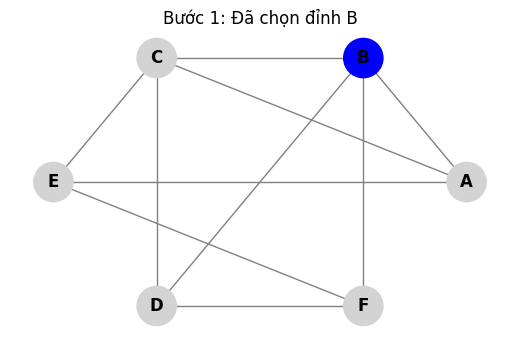


CHUẨN BỊ BƯỚC 2
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,2,0,3,2,3,2
Trạng thái,Chưa tô,Đã tô (Blue),Chưa tô,Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh C (Bậc = 3) -> Tô màu Red


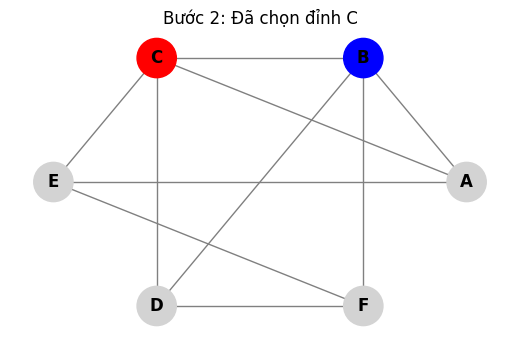


CHUẨN BỊ BƯỚC 3
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,1,0,0,1,2,2
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Chưa tô,Chưa tô,Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh E (Bậc = 2) -> Tô màu Blue


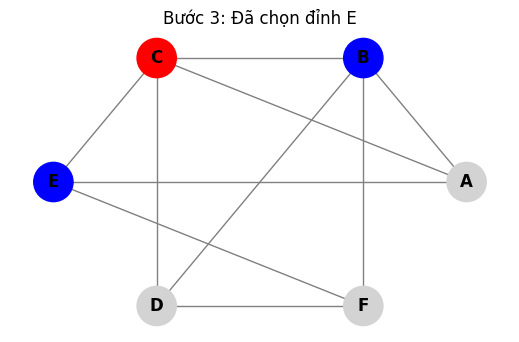


CHUẨN BỊ BƯỚC 4
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,1,0,1
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Chưa tô,Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh D (Bậc = 1) -> Tô màu Yellow


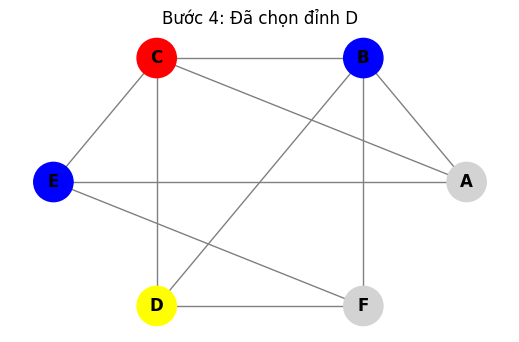


CHUẨN BỊ BƯỚC 5
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,0,0,0
Trạng thái,Chưa tô,Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh A (Bậc = 0) -> Tô màu Yellow


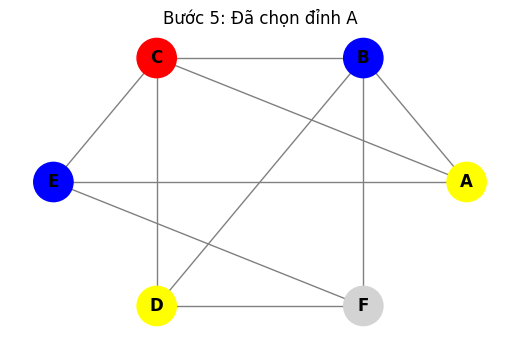


CHUẨN BỊ BƯỚC 6
Bảng bậc các đỉnh:


,A,B,C,D,E,F
Bậc hiện tại,0,0,0,0,0,0
Trạng thái,Đã tô (Yellow),Đã tô (Blue),Đã tô (Red),Đã tô (Yellow),Đã tô (Blue),Chưa tô


---> QUYẾT ĐỊNH: Chọn đỉnh F (Bậc = 0) -> Tô màu Red


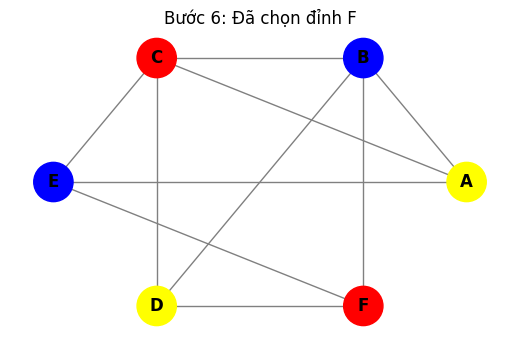


=== KẾT QUẢ CUỐI CÙNG ===
Đỉnh A: Màu Yellow
Đỉnh B: Màu Blue
Đỉnh C: Màu Red
Đỉnh D: Màu Yellow
Đỉnh E: Màu Blue
Đỉnh F: Màu Red


In [9]:
print("--- KẾT QUẢ TÔ MÀU ĐỒ THỊ ---")
# 1. Load file
G = loadGraph("graph.txt")

if G:
    # 2. Chạy thuật toán
    result = graph_coloring_visualized(G)

    # 3. Tổng kết
    print("\n=== KẾT QUẢ CUỐI CÙNG ===")
    for node in sorted(result.keys()):
        print(f"Đỉnh {node}: Màu {result[node]}")